In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Cambiar directorio
os.chdir("..")

In [18]:
# Cargar los datos que tenemos disponibles
data = pd.read_csv("/content/churn.csv")


In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
# Nos deshacemos de las columnas que no contribuyen en mucho
data = data.drop(data.columns[0:3], axis=1)

In [6]:
#Validación de data null
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              10000 non-null  int64  
 1   Tenure           10000 non-null  int64  
 2   Balance          10000 non-null  float64
 3   NumOfProducts    10000 non-null  int64  
 4   HasCrCard        10000 non-null  int64  
 5   IsActiveMember   10000 non-null  int64  
 6   EstimatedSalary  10000 non-null  float64
 7   Exited           10000 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 625.1 KB


In [ ]:
#estadisticos
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Geography,10000.0,0.746300,0.827529,0.00,0.00,0.000,1.0000,2.00
Gender,10000.0,0.545700,0.497932,0.00,0.00,1.000,1.0000,1.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


#Data Viz


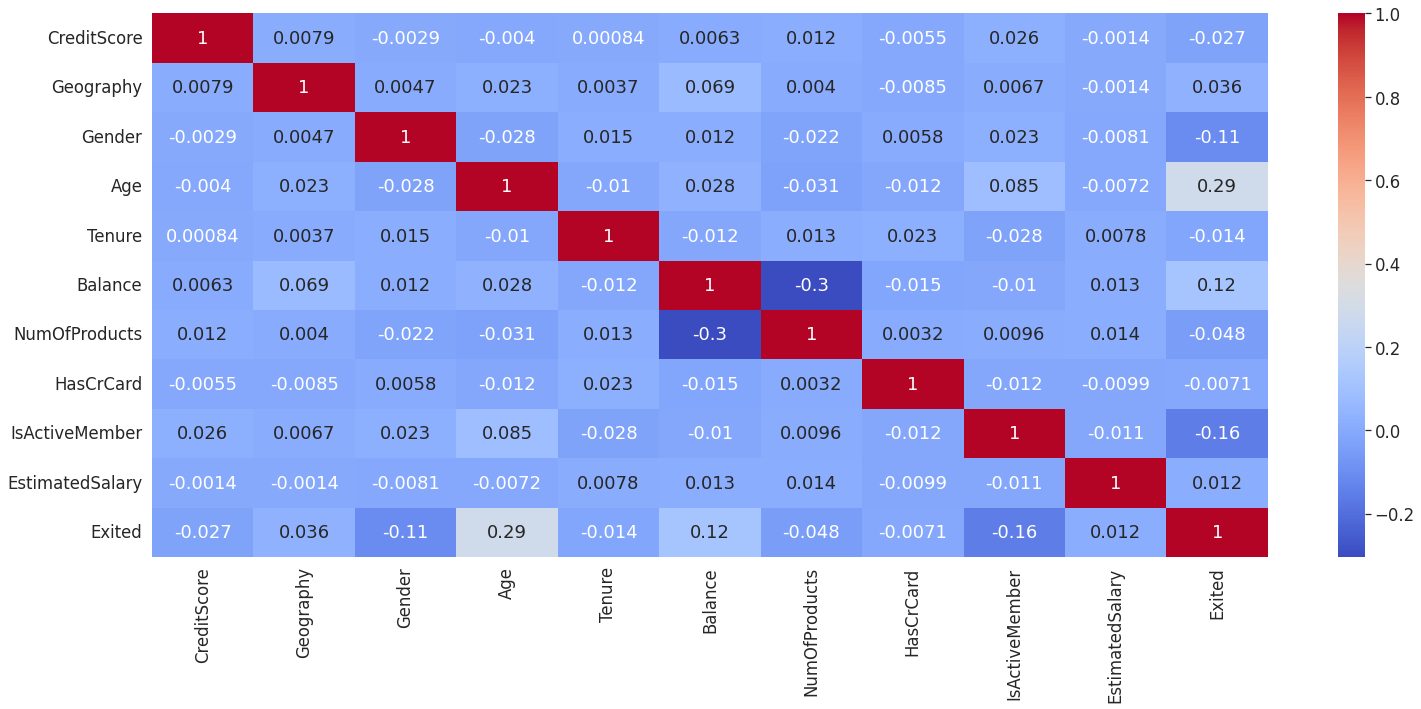

In [ ]:
plt.figure(figsize=(25,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

Se puede apreciar una pobre correlación de los datos.

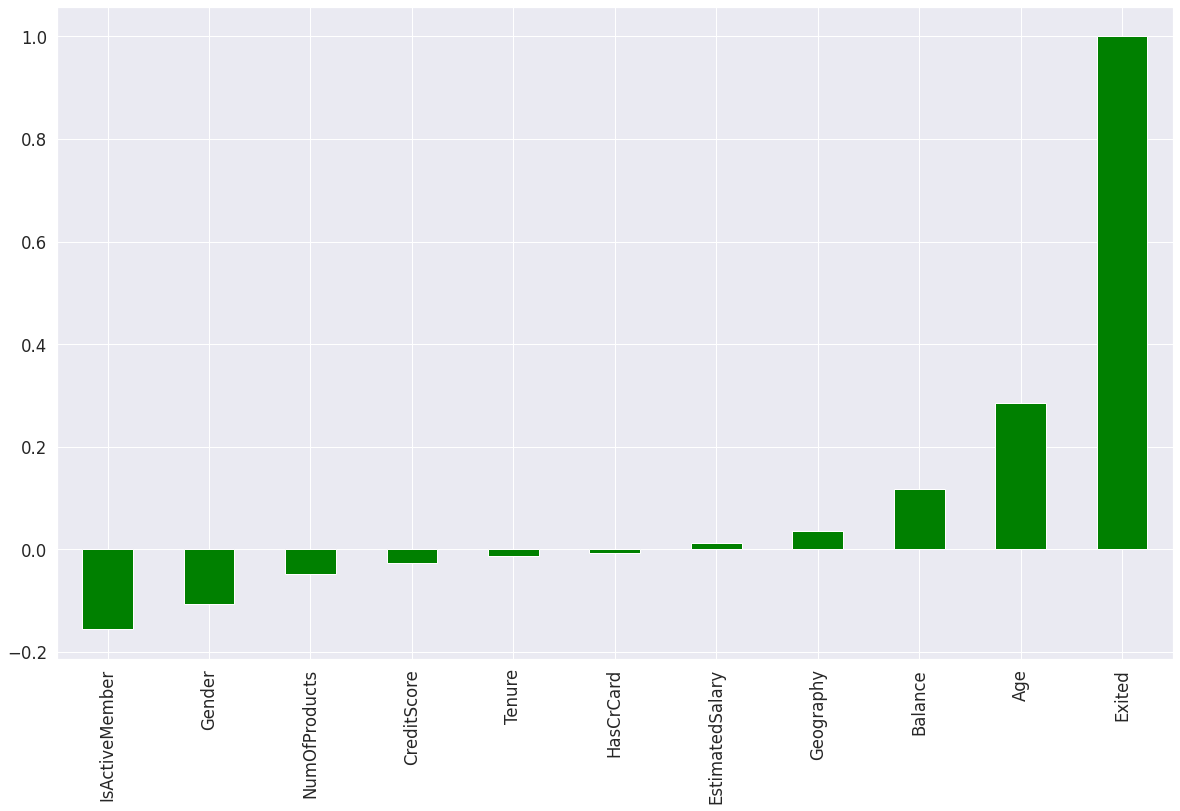

In [ ]:
fig= plt.figure(figsize=(20,12))
sns.set(font_scale=1.5)
data.corr()['Exited'].sort_values(ascending=True).plot(kind='bar',color='green')
plt.show()

>En esta gráfico podemos apreciar las variables con mejor correlación.
Y vemos como variables como genero, num of products, no generan una correlación. En cambio es una correlación inversa.

>Las variables a tratar son Gegrofía, balance y edad.


In [ ]:
fig= plt.figure(figsize=(20,12))
sns.heatmap(data, annot=True, cmap='coolwarm')
plt.ylabel('Actual label')
plt.xlabel('Predicted Label')

<Figure size 1440x720 with 0 Axes>

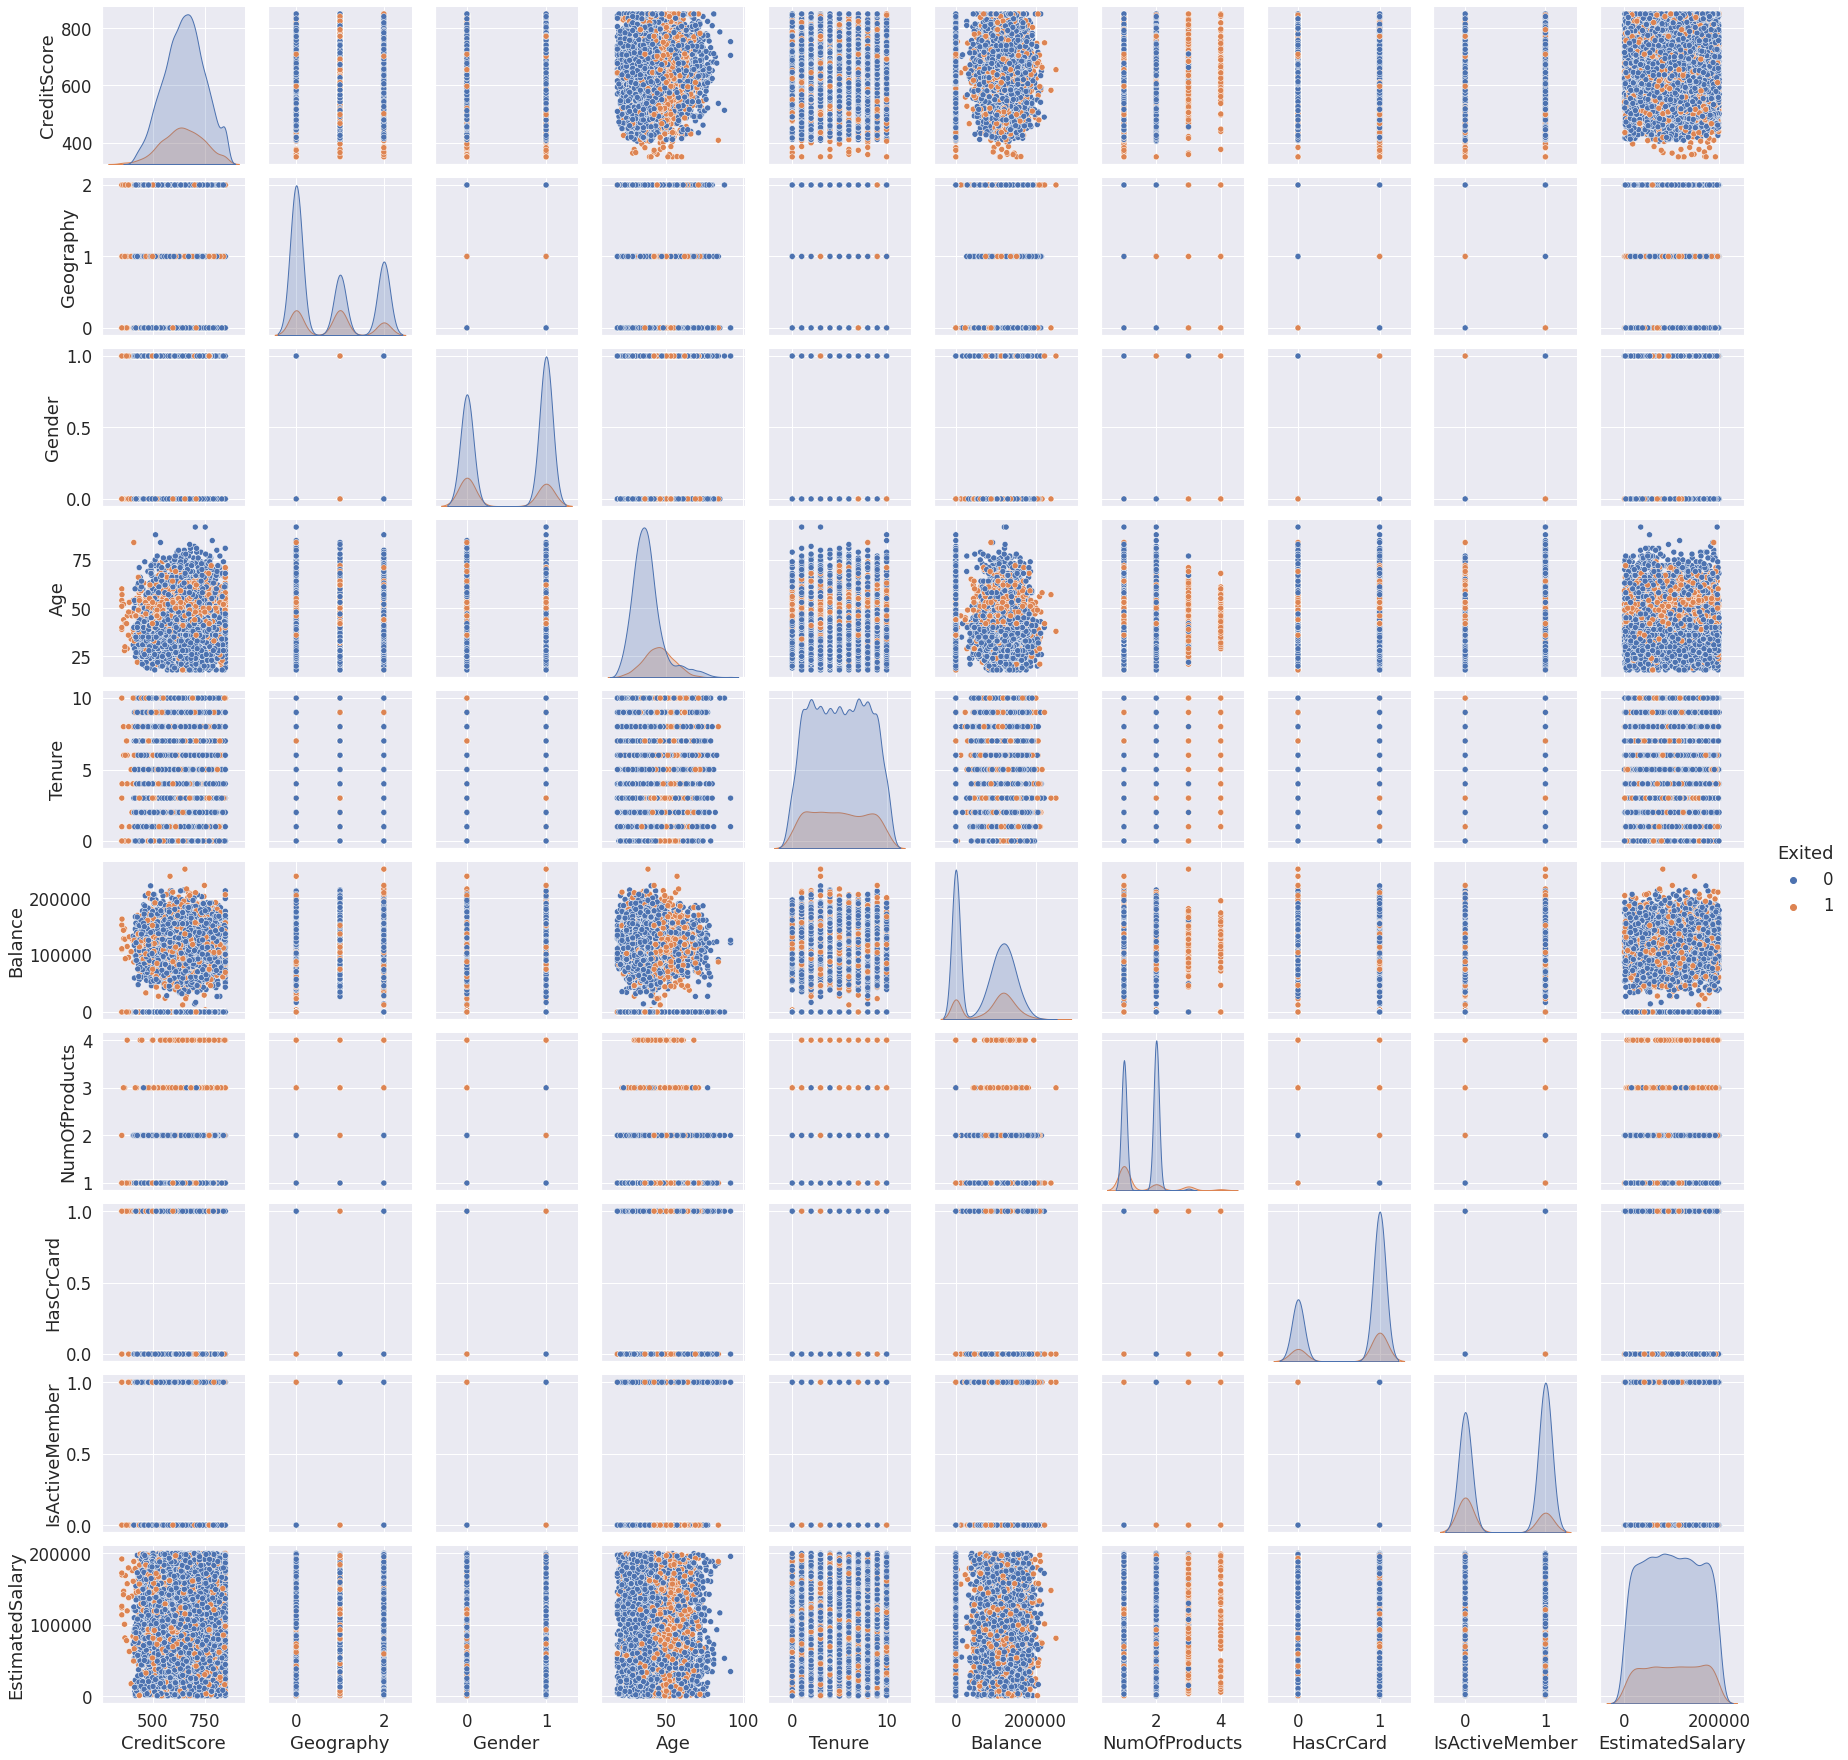

In [ ]:
fig= plt.figure(figsize=(20,10))
sns.pairplot(data, hue='Exited')

# Procesamiento de datos categoricos a numéricos

1. Diccionario: Guarda la iteracion de la equivalencia  entre valores categoricos y numericos
2. Lista que guardara el nombre de las columnas
3. Itera sobre las variables, transformandolas a strings y las almacena en i
4. Llenamos la data vacia por moda
5. Se convierte la columna a tipo "category" y se crea un diccionario que asocia cada valor categórico con un número int.
6. El resultado de categorical_column, se guardara en current_column_equivalence, utilizando el indice (cat) como clave
7. Se invierte este diccionario para crear un segundo diccionario que asocia cada número entero con un valor categórico, y se almacena en el diccionario. utilizando el índice de la columna como clave
8. Se codifican los valores categóricos de la columna utilizando los números enteros correspondientes.
9. En este bloque de código se realiza el preprocesamiento de las columnas numéricas. Si una columna no es de tipo "object", se rellenan los valores faltantes con la mediana de la columna.

In [22]:
# Convertimos los datos en formato categorico, para más info: shorturl.at/y0269
column_equivalence = {} #1
features = list(data.columns) #2
for i, column in enumerate(list([str(d) for d in data.dtypes])): #3
    if column == "object":
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].mode())#4
        categorical_column = data[data.columns[i]].astype("category") #5
        current_column_equivalence = dict(enumerate(categorical_column.cat.categories))#6
        column_equivalence[i] = dict((v,k) for k,v in current_column_equivalence.items())#7
        data[data.columns[i]] = categorical_column.cat.codes#8
    else:
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].median())#9

In [23]:
column_equivalence

{1: {'France': 0, 'Germany': 1, 'Spain': 2}, 2: {'Female': 0, 'Male': 1}}

# Model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression


In [25]:
# Generar los datos para poder separar la variable de respuesta de los datos que tenemos disponibles
X = data.copy()
y = X.pop(data.columns[-1])

In [26]:
#Escabilidad de la data
scaler= MinMaxScaler()
data_scaled= scaler.fit_transform(data)
data_scaled= pd.DataFrame(data_scaled)
data_scaled.columns=data_scaled.columns
data_scaled.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0


#Entrenamiento y mejora del modelo

In [13]:
def logistic_model(C_, solver_,multiclass_):
  Logistic_Regression_model = LogisticRegression(random_state=42, solver= solver_, multi_class=multiclass_, n_jobs=-1, C=C_)
  return Logistic_Regression_model

In [28]:
# Separar los datos en datos de entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [29]:
model= logistic_model(1, 'newton-cg', 'multinomial')
model.fit(X_train,y_train)
prediction= model.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(accuracy_score(y_test,prediction))

[[2357   59]
 [ 489   95]]
0.8173333333333334


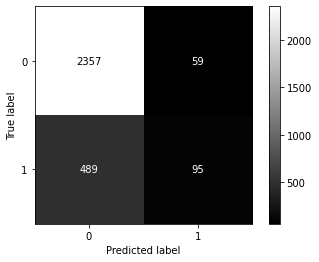

In [30]:
cm=confusion_matrix(y_test, prediction, labels=model.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()

In [ ]:
# Generar el binario del modelo para reutilizarlo, equivalencia de variables categoricas y caracteristicas del modelo
import pickle
pickle.dump(Logistic_Regression_model, open("churn/models/model.pk", "wb"))
pickle.dump(column_equivalence, open("churn/models/column_equivalence.pk", "wb"))
pickle.dump(features, open("churn/models/features.pk", "wb"))